0.34695728040249807 0.9378957726242301
0.45678254661569573 1.2383669002307087
0.49151089634338235 1.3368855839244906
0.5024578038363288 1.3713652071588096
0.5058745289086375 1.3854840789617684
0.5069077137951118 1.3930767983963837
0.5071872382442357 1.3985265998643739
0.5072292459530868 1.403223483026752
0.5071971680562279 1.407609463462344
0.5071427345079239 1.4118262919184816
0.5070823008690754 1.415920584041306
0.5070210205088427 1.4199087847349996
0.5069604997743072 1.4237977429952742
0.5069012223193645 1.4275912288314878
0.5068433168593042 1.4312919981113787
0.5067868002989945 1.4349024474368137
0.5067316547155184 1.4384248224679117
0.5066778517239032 1.441861284804395
0.5066253601797505 1.4452139340507861
0.5065741486051036 1.44848481566704
0.5065241859435264 1.4516759242964756
0.5064754417863756 1.4547892056408642
0.5064278864319162 1.4578265578553882
0.5063814908918065 1.4607898327720026
0.5063362268812124 1.4636808370493966
0.5062920668040293 1.4665013332811077
0.5062489837368

<Figure size 640x480 with 0 Axes>

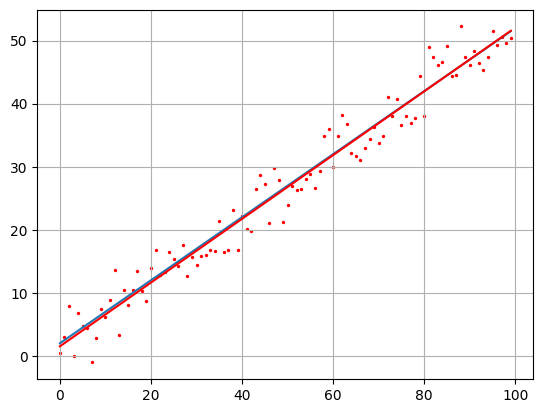

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y-ff).T, (y-ff))

def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*np.dot((y - ff).T, range(N))

def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*(y - ff).sum()


N = 100       # число экспериментов
Niter = 50 # число итераций
sigma = 3   # стандартное отклонение наблюдаемых значений
at = 0.5     # теоретическое значение параметра k
bt = 2       # теоретическое значение параметра b

aa = 0
bb = 0
lmd1 = 0.000001
lmd2 = 0.0005

f = np.array([at*z+bt for z in range(N)])
y = np.array(f + np.random.normal(0, sigma, N))

a_plt = np.arange(-1, 2, 0.1)
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

plt.ion()   # включение интерактивного режима отображения графиков
fig = plt.figure()
ax = Axes3D(fig)

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

point = ax.scatter(aa, bb, E(y, aa, bb), c='red')  # отображение точки красным цветом

for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)

    ax.scatter(aa, bb, E(y, aa, bb), c='red')

    # перерисовка графика и задержка на 10 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

    print(aa, bb)

plt.ioff()   # выключение интерактивного режима отображения графиков
plt.show()

# отображение графиков аппроксимации
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()